# Predict housing price from features

### https://www.kaggle.com/code/samsonblack/exercise-machine-learning-competitions?scriptVersionId=98048459 

In [1]:
# Import libraries 
import numpy as np 
import pandas as pd

In [2]:
# Load the data, and separate the target
iowa_data_path = 'data-science-sandbox/housing_prices_competition/data/'
iowa_train_path = iowa_data_path + 'train.csv'
home_data = pd.read_csv(iowa_train_path)
y = home_data.SalePrice

In [3]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Random Forest model 

In [4]:
# Select important features 
print(home_data.columns) 
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Select columns corresponding to features, and preview the data 
X = home_data[features]
X.head() 

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model and validate with Mean Absolute Error 
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X) 
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)
out_str = 'Mean Absolute Error with for Random Forest model:  {:,.0f}'
print(out_str.format(rf_val_mae)) 

Mean Absolute Error with for Random Forest model:  21,857


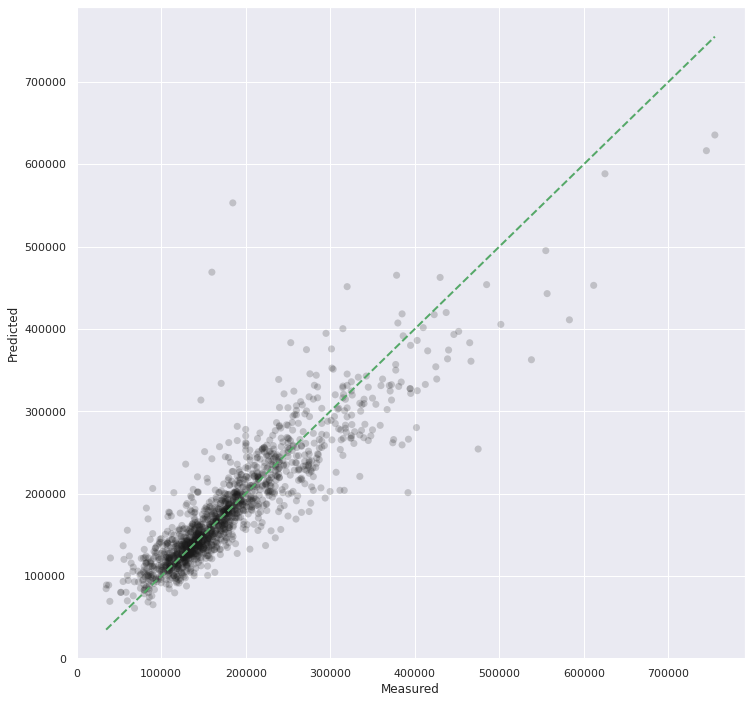

In [7]:
# Cross validate predictions (5-fold)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import cross_val_predict 
predicted = cross_val_predict(rf_model, X, y)

fig, ax = plt.subplots(figsize=[12, 12])
ax.scatter(y, predicted, s=50, c='k', alpha=0.2, edgecolors='none', linewidths=0.5)
ax.plot([y.min(), y.max()], [y.min(), y.max()], "g--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show();

## Optimize hyperparameters via grid search

In [8]:
def get_params_pretty(model): 
    params = model.get_params().keys() 
    w = max([len(p) for p in params]) 
    for key, val in model.get_params().items(): 
        print('{}:  {}'.format(str(key).rjust(w), val)) 
    return None

get_params_pretty(rf_model) 

               bootstrap:  True
               ccp_alpha:  0.0
               criterion:  squared_error
               max_depth:  None
            max_features:  auto
          max_leaf_nodes:  None
             max_samples:  None
   min_impurity_decrease:  0.0
        min_samples_leaf:  1
       min_samples_split:  2
min_weight_fraction_leaf:  0.0
            n_estimators:  100
                  n_jobs:  None
               oob_score:  False
            random_state:  1
                 verbose:  0
              warm_start:  False


In [9]:
from sklearn.model_selection import GridSearchCV  

param_grid = {'max_depth': np.arange(12, 20),
              'n_estimators': np.arange(60, 90, 10)}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7) 
grid.fit(train_X, train_y);  
grid.best_params_ 

{'max_depth': 14, 'n_estimators': 70}

In [10]:
# create a new Random Forest model and fit model on all data 
rf_model_on_full_data = RandomForestRegressor(random_state=1, **grid.best_params_) 
rf_model_on_full_data.fit(X, y)


# predict using test data
test_test_path = iowa_data_path + 'test.csv'
test_data = pd.read_csv(test_test_path)
test_X = test_data[features]
test_preds = rf_model_on_full_data.predict(test_X)

# save predictions as CSV 
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('data/submission.csv', index=False)

# Logistic Regression model 

## Clean full data and keep only numerical features

In [11]:
print(home_data.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [12]:
numerical_data = home_data.select_dtypes(include=['int64', 'float64']) 
numerical_data.drop(columns=['Id', 'SalePrice'], inplace=True)
numerical_data.dropna(inplace=True) 
numerical_data.shape

(1121, 36)

In [13]:
numerical_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [14]:
# Remove same samples from 'SalePrice' 
y2 = numerical_data.merge(y, left_index=True, right_index=True, how='inner') 
y2 = y2['SalePrice'] 
y2

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [15]:
# Split into validation and training data using all numerical features 
train_X, val_X, train_y, val_y = train_test_split(numerical_data, y2, random_state=1) 

## Build logit model pipeline, train and validate 

In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 

logit_model = make_pipeline(SimpleImputer(strategy='mean'), 
                            StandardScaler(), 
                            LogisticRegression(max_iter=200, random_state=1))
logit_model.fit(train_X, train_y) 
logit_val_predictions = logit_model.predict(val_X) 
logit_val_mae = mean_absolute_error(logit_val_predictions, val_y)
out_str = 'Mean Absolute Error with for Logistic Regression Model:  {:,.0f}'
print(out_str.format(logit_val_mae)) 

Mean Absolute Error with for Logistic Regression Model:  30,388


# Reduce dimensions with PCA 

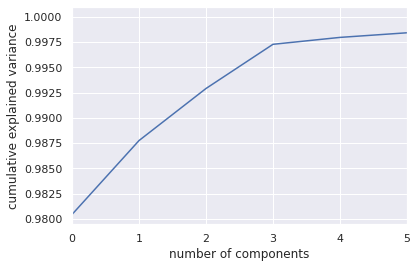

In [17]:
from sklearn.decomposition import PCA 

pca = PCA().fit(numerical_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim([0, 5]); 

## Keep 3 components (expains 99.75% of variance) 

In [18]:
pca3 = PCA(3).fit_transform(numerical_data) 
pca3

pca3_data = pd.DataFrame(pca3, columns=['X_' + str(j) for j in range(3)]) 
pca3_data 

,X_0,X_1,X_2
0,-1671.671575,-16.202344,-226.525819
1,-518.154944,-4.612125,764.657567
2,1127.784812,8.529416,-441.319287
3,-578.998932,-131.014023,-555.825958
4,4156.646591,527.896093,-533.817626
...,...,...,...
1116,-2212.978462,-21.609828,-656.940429
1117,3087.105103,889.207079,518.326209
1118,-1062.711097,637.020864,-937.422025
1119,-421.708321,-670.834477,354.275714


In [19]:
# Split into validation and training data using all numerical features 
train_X, val_X, train_y, val_y = train_test_split(pca3_data, y2, random_state=1) 

In [20]:
from sklearn.linear_model import LinearRegression 

lin_model = LinearRegression() 
lin_model.fit(train_X, train_y) 

lin_val_predictions = lin_model.predict(val_X) 
lin_val_mae = mean_absolute_error(lin_val_predictions, val_y)
out_str = 'Mean Absolute Error with for Linear Regression model on 3 PCA components:  {:,.0f}'
print(out_str.format(lin_val_mae)) 

Mean Absolute Error with for Linear Regression model on 3 PCA components:  33,298


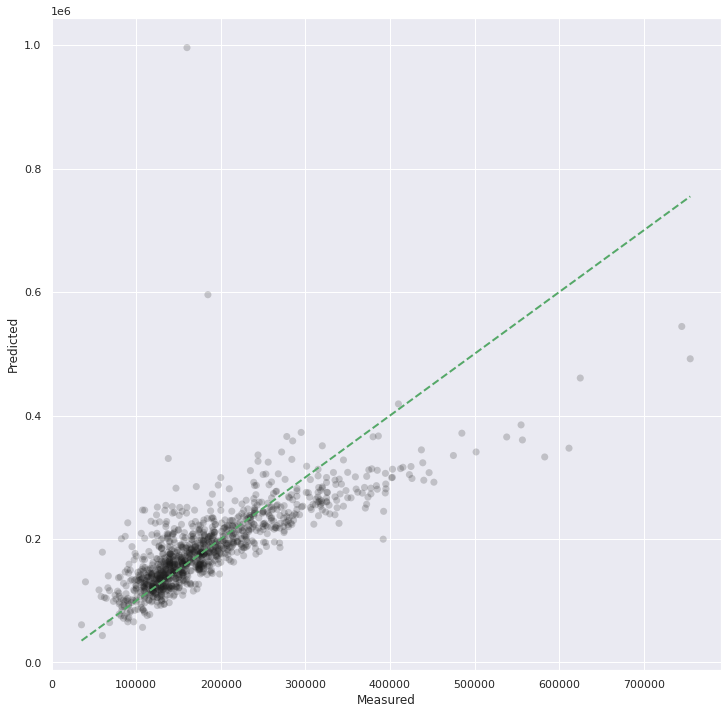

In [21]:
# Cross validate predictions (5-fold)
predicted = cross_val_predict(lin_model, pca3_data, y2)

fig, ax = plt.subplots(figsize=[12, 12])
ax.scatter(y2, predicted, s=50, c='k', alpha=0.2, edgecolors='none', linewidths=0.5)
ax.plot([y2.min(), y2.max()], [y2.min(), y2.max()], "g--", lw=2)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show();